In [0]:
# import pandas
import pandas as pd
import numpy as np

In [3]:
from google.colab import files
files.upload()

Saving Advertising.csv to Advertising.csv


{'Advertising.csv': b',TV,Radio,Newspaper,Sales\n1,230.1,37.8,69.2,22.1\n2,44.5,39.3,45.1,10.4\n3,17.2,45.9,69.3,9.3\n4,151.5,41.3,58.5,18.5\n5,180.8,10.8,58.4,12.9\n6,8.7,48.9,75,7.2\n7,57.5,32.8,23.5,11.8\n8,120.2,19.6,11.6,13.2\n9,8.6,2.1,1,4.8\n10,199.8,2.6,21.2,10.6\n11,66.1,5.8,24.2,8.6\n12,214.7,24,4,17.4\n13,23.8,35.1,65.9,9.2\n14,97.5,7.6,7.2,9.7\n15,204.1,32.9,46,19\n16,195.4,47.7,52.9,22.4\n17,67.8,36.6,114,12.5\n18,281.4,39.6,55.8,24.4\n19,69.2,20.5,18.3,11.3\n20,147.3,23.9,19.1,14.6\n21,218.4,27.7,53.4,18\n22,237.4,5.1,23.5,12.5\n23,13.2,15.9,49.6,5.6\n24,228.3,16.9,26.2,15.5\n25,62.3,12.6,18.3,9.7\n26,262.9,3.5,19.5,12\n27,142.9,29.3,12.6,15\n28,240.1,16.7,22.9,15.9\n29,248.8,27.1,22.9,18.9\n30,70.6,16,40.8,10.5\n31,292.9,28.3,43.2,21.4\n32,112.9,17.4,38.6,11.9\n33,97.2,1.5,30,9.6\n34,265.6,20,0.3,17.4\n35,95.7,1.4,7.4,9.5\n36,290.7,4.1,8.5,12.8\n37,266.9,43.8,5,25.4\n38,74.7,49.4,45.7,14.7\n39,43.1,26.7,35.1,10.1\n40,228,37.7,32,21.5\n41,202.5,22.3,31.6,16.6\n42,177,33.4

In [5]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('Advertising.csv', index_col=0)

# display the first 5 rows
data.head(10)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [6]:
# display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [7]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data 


In [0]:
# conventional way to import seaborn
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

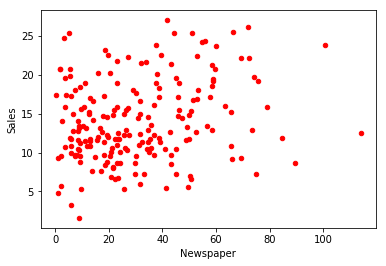

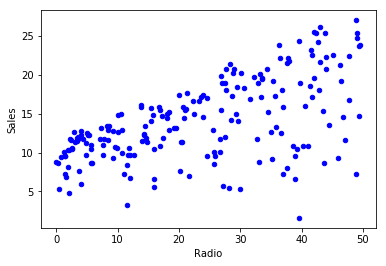

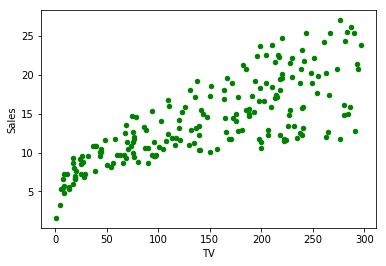

In [9]:
data.plot(kind='scatter',x='Newspaper',y='Sales',color='red')
data.plot(kind='scatter',x='Radio',y='Sales',color='blue')
data.plot(kind='scatter',x='TV',y='Sales',color='green')

## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [10]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV','Radio','Newspaper']]

# print the first 5 rows
X.head()


,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [11]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [12]:
# select a Series from the DataFrame
lab = ['Sales']

# equivalent command that works if there are no spaces in the column name
y =  data['Sales']



# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [13]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Splitting X and y into training and testing sets

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [0]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# X_train = X_train[:150]

print(X_test)

## Linear regression in scikit-learn

In [0]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
model = linreg.fit(X_train, y_train)



### Making predictions

In [19]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
print(y_pred)

[21.70910292 16.41055243  7.60955058 17.80769552 18.6146359  23.83573998
 16.32488681 13.43225536  9.17173403 17.333853   14.44479482  9.83511973
 17.18797614 16.73086831 15.05529391 15.61434433 12.42541574 17.17716376
 11.08827566 18.00537501  9.28438889 12.98458458  8.79950614 10.42382499
 11.3846456  14.98082512  9.78853268 19.39643187 18.18099936 17.12807566
 21.54670213 14.69809481 16.24641438 12.32114579 19.92422501 15.32498602
 13.88726522 10.03162255 20.93105915  7.44936831  3.64695761  7.22020178
  5.9962782  18.43381853  8.39408045 14.08371047 15.02195699 20.35836418
 20.57036347 19.60636679]


We need an **evaluation metric** in order to compare our predictions with the actual values!